In [14]:
!pip install altair seaborn 

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.2/162.2 kB 1.5 MB/s eta 0:00:00a 0:00:01
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 1.6 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 1.2 MB/s eta 0:00:00a 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.0 MB/s eta 0:00:00
Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)


# Global Temperature Anomalies

## Load the dataset

Load the dataset and perform some preliminary cleaning. Then, show a raw chart

In [1]:
import pandas as pd

df = pd.read_csv('data/1850-2024.csv')
df.head()

,Date,Anomaly
0,185001,-0.46
1,185002,-0.21
2,185003,-0.22
3,185004,-0.35
4,185005,-0.29


In [2]:
# Function to convert YYYYMM to YYYY-MM-DD
def convert_to_date(yyyymm):
    year = int(str(yyyymm)[:4])
    month = int(str(yyyymm)[4:6])
    return pd.Timestamp(year=year, month=month, day=1)

# Apply the conversion function to the Date column
df['Date'] = df['Date'].apply(convert_to_date)

# Verify the conversion
df.head()

,Date,Anomaly
0,1850-01-01,-0.46
1,1850-02-01,-0.21
2,1850-03-01,-0.22
3,1850-04-01,-0.35
4,1850-05-01,-0.29


In [4]:
import altair as alt

chart = alt.Chart(df
).mark_line(
).encode(
    x='Date',
    y='Anomaly'
).properties(
    width=800
)

chart

alt.Chart(...)

The chart shows a time series graph of temperature anomalies from around 1850 to 2020. Here's an analysis of the results:

#### Key Observations:
1. **Trend Over Time**:
   - There is a clear upward trend in temperature anomalies over the entire period.
   - From around 1850 to the early 1900s, the anomalies fluctuated without a clear long-term trend.
   - Post-1900, particularly post-1970, there is a noticeable and consistent increase in temperature anomalies.

2. **Periods of Stability and Change**:
   - The period from 1850 to about 1910 shows fluctuations around the baseline with no significant long-term increase or decrease.
   - From 1910 to about 1940, there is a noticeable increase in anomalies.
   - There is a period of stability or slight decrease from 1940 to 1970.
   - Post-1970, there is a sharp and continuous increase in temperature anomalies.

3. **Recent Years**:
   - The most recent years (post-2000) show the highest anomalies, indicating accelerated warming.

#### Interpretation:
- **Long-term Trend**: The long-term trend indicates global warming, particularly significant in the last few decades.
- **Variability**: While there are short-term variations and periods of relative stability, the overall trend is upward, suggesting a consistent rise in global temperatures.
- **Impact of Human Activities**: The sharp increase post-1970 coincides with the period of significant industrial growth and increased greenhouse gas emissions, supporting the hypothesis that human activities are contributing to global warming.

#### Conclusion:
The graph shows compelling evidence of long-term global warming, particularly significant in the recent past. The increasing trend in temperature anomalies suggests that global temperatures are rising, with the most pronounced changes occurring in the last few decades. This data is consistent with the broader scientific consensus on climate change and highlights the importance of addressing global warming.

Matplotlib is building the font cache; this may take a moment.


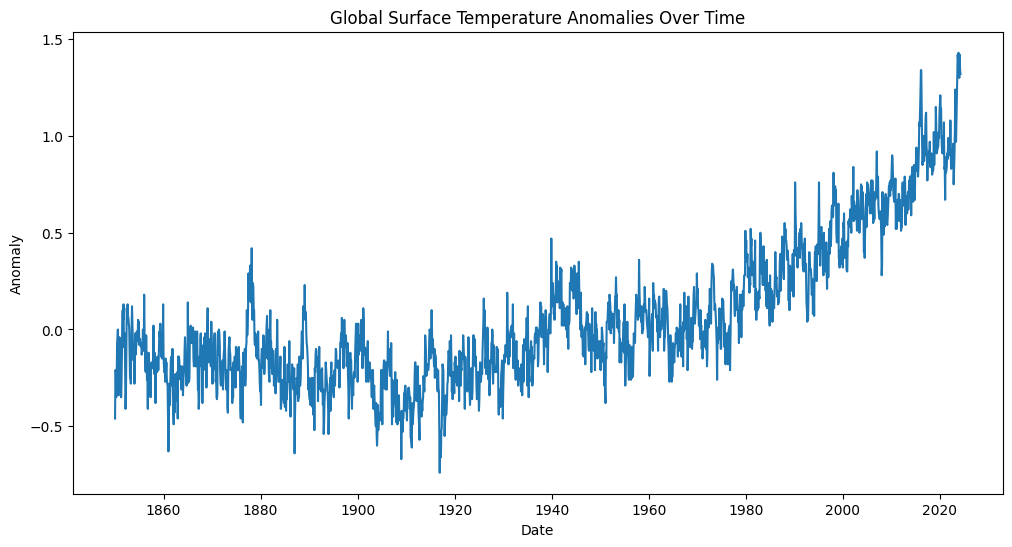

In [15]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the plot
plt.figure(figsize=(12, 6))

# Create the line plot
sns.lineplot(data=df, x='Date', y='Anomaly')

# Set plot title and labels
plt.title('Global Surface Temperature Anomalies Over Time')
plt.xlabel('Date')
plt.ylabel('Anomaly')

# Display the plot
plt.show()


## Build a story for an audience of professionals 
Apply the DIKW pyramid

### From Data to Information

In [450]:
chart = alt.Chart(df
).mark_bar(
).encode(
    x='Date',
    y='Anomaly'
).properties(
    width=900
)

chart

alt.Chart(...)

## Change color using a [color scheme](https://vega.github.io/vega/docs/schemes/#reference)

In [451]:
chart = alt.Chart(df
).mark_bar(
).encode(
    x='Date',
    y='Anomaly',
    color=alt.Color('Anomaly', scale=alt.Scale(scheme='redblue', reverse=True))
).properties(
    width=800
)

chart

alt.Chart(...)

## Create period bins (decade)

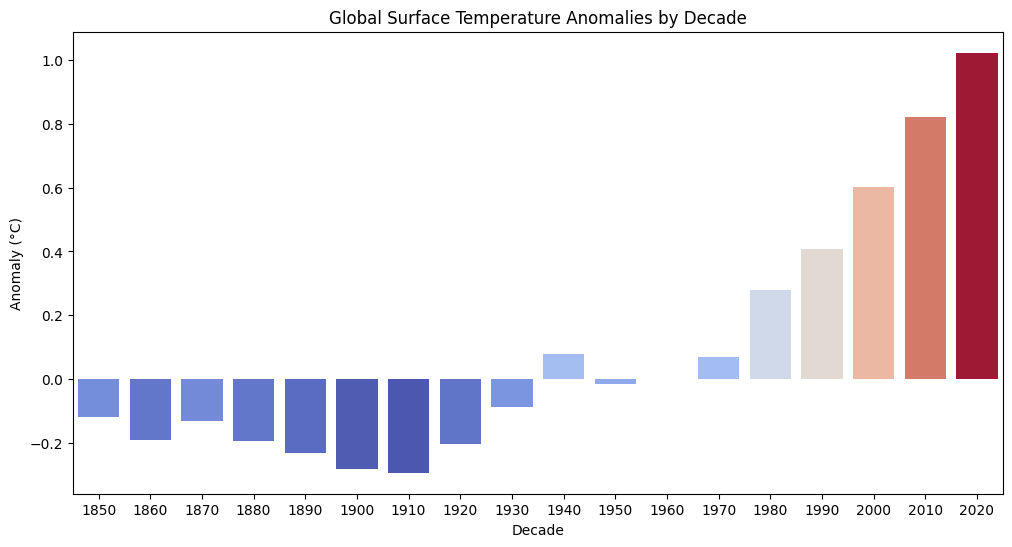

In [18]:
# Calculate Decade for each date
df['Decade'] = df['Date'].dt.year // 10 * 10

# Aggregate anomalies by decade
agg_df = df.groupby('Decade').mean().reset_index()

# Initialize the plot
plt.figure(figsize=(12, 6))

# Generate a list of colors from the 'coolwarm' colormap
cmap = plt.get_cmap('coolwarm')
norm = plt.Normalize(agg_df['Anomaly'].min(), agg_df['Anomaly'].max())
colors = cmap(norm(agg_df['Anomaly'].values))

# Convert colormap to a list
color_list = [cmap(norm(value)) for value in agg_df['Anomaly'].values]

# Create the bar plot
barplot = sns.barplot(x='Decade', y='Anomaly', data=agg_df, palette=color_list, hue='Decade', dodge=False, legend=False)

# Set plot title and labels
plt.title('Global Surface Temperature Anomalies by Decade')
plt.xlabel('Decade')
plt.ylabel('Anomaly (°C)')

# Display the plot
plt.show()

In Altair, the difference between using `Decade:O` and `Decade:N` lies in how the data is treated and displayed:

1. **Decade:O (Ordinal)**:
   - **Interpretation**: Treats the data as ordinal. This means the data is assumed to have a specific order, but not necessarily a numeric scale. It's often used for categorical data that has a meaningful sequence.
   - **Behavior**: 
     - Ensures the data is displayed in the order it appears in the dataset.
     - Useful for ordered categories such as days of the week, months, or decades, where the order is important, but the exact numeric value is not.

   Example: When using `Decade:O`, Altair will treat the decades as an ordered sequence. This ensures that the decades are displayed in chronological order, but it doesn't assume any numeric relationship between them (e.g., 1980 is not considered 90 units before 2070).

2. **Decade:N (Nominal)**:
   - **Interpretation**: Treats the data as nominal. This means the data is considered as names or labels without any intrinsic order or numeric relationship. It's used for categorical data where the order does not matter.
   - **Behavior**:
     - Treats each category independently, without implying any order.
     - Useful for non-ordered categories like country names, types of fruit, or other labels where the sequence is irrelevant.

   Example: When using `Decade:N`, Altair will treat each decade purely as a label. The order in which the decades are displayed might be determined by the order they appear in the dataset or some internal sorting mechanism, but there's no assumption of a sequence.

### Practical Impact in Your Chart

For your specific case of visualizing temperature anomalies by decade:

- **Using `Decade:O`**:
  - Ensures that the decades are treated as a sequence, which is important for chronological data.
  - Decades will appear in the correct chronological order on the x-axis.
  - This is typically the appropriate choice for time-based categories where the order matters.

- **Using `Decade:N`**:
  - Treats each decade purely as a label without any implied order.
  - The order of decades on the x-axis might not be chronological unless explicitly sorted.
  - Less appropriate for chronological data as it might disrupt the intended sequence.



In [8]:
# Create a bar chart using Altair

chart = alt.Chart(df  # Initialize the chart with the DataFrame 'df'
).mark_bar(  # Specify that we are using bar marks for the chart
).encode(  # Define the encodings for the chart
    x='Decade:N',  # The x-axis will represent 'Decade' as a nominal (categorical) variable
    y='Anomaly',  # The y-axis will represent the 'Anomaly' values
    color=alt.Color('Anomaly', scale=alt.Scale(scheme='redblue', reverse=True))  # Color the bars based on the 'Anomaly' values using a reversed red-to-blue color scheme
).properties(
    width=800  # Set the width of the chart to 800 pixels
).transform_calculate(
    Decade = "(year(datum.Date) - year(datum.Date) % 10)"  # Calculate the decade for each data point by subtracting the year modulo 10 from the year
)

chart  # Display the chart

alt.Chart(...)

In [5]:
chart = alt.Chart(df
).mark_bar(
).encode(
    x='Decade:N',
    y='Anomaly',
    color=alt.Color('Anomaly', scale=alt.Scale(scheme='redblue', reverse=True))
).properties(
    width=800
).transform_calculate(
     Decade = "(year(datum.Date) - year(datum.Date) % 10)"  # Calculate the decade
).transform_aggregate(
    Anomaly='mean(Anomaly)',
    groupby=['Decade']
)

chart

alt.Chart(...)

## Group data by decades and remove the last decade (2020s), which is incomplete

In [9]:
chart = alt.Chart(df  # Create a chart object from the DataFrame 'df'
).mark_bar(  # Specify that the chart will use bar marks
).encode(  # Define the encoding for the chart
    x='Decade:N',  # X-axis will represent the decade as a nominal (categorical) value
    y='Anomaly',  # Y-axis will represent the temperature anomaly
    color=alt.Color('Anomaly', scale=alt.Scale(scheme='redblue', reverse=True))  # Color the bars based on the anomaly value, using a red-to-blue color scheme with reversed scaling
).properties(
    width=800  # Set the width of the chart to 800 pixels
).transform_filter(
    "year(datum.Date) < 2020"  # Filter the data to include only records where the year is less than 2020
).transform_calculate(
    Decade = "(year(datum.Date) - year(datum.Date) % 10)"  # Calculate the decade for each record by subtracting the year modulo 10 from the year
).transform_aggregate(
    Anomaly='mean(Anomaly)',  # Aggregate the data by calculating the mean anomaly for each decade
    groupby=['Decade']  # Group the data by decade
)

chart  # Display the chart


alt.Chart(...)

## Adjust axes

In [10]:
# Modify the chart encoding to adjust the x-axis and y-axis
chart = chart.encode(
    # Encoding for the x-axis
    x=alt.X(
        'Decade:O',  # Treat 'Decade' as an ordinal (O) data type
        axis=alt.Axis(
            title='',  # Remove the title from the x-axis
            labelAngle=0,  # Set the angle of the x-axis labels to 0 degrees (horizontal)
            labelExpr="datum.value + 's'",  # Add 's' to the end of each decade label (e.g., '1990' becomes '1990s')
        )
    ),
    # Encoding for the y-axis
    y=alt.Y(
        'Anomaly',  # Use 'Anomaly' for the y-axis
        title='Global Surface Temperature Anomalies (°C)'  # Set the title for the y-axis
    ),
    # Encoding for the color of the bars
    color=alt.Color(
        'Anomaly',  # Use 'Anomaly' to determine the color of the bars
        scale=alt.Scale(
            scheme='redblue',  # Use the 'redblue' color scheme
            reverse=True  # Reverse the color scale (so higher anomalies are red and lower are blue)
        )
    )
)

# Display the chart
chart


alt.Chart(...)

### From Information to Knowledge

Add values for each bar

In [11]:

# Add text annotations to the chart
text = chart.mark_text(
    align='center',  # Align the text to the center
    baseline='top',  # Set the baseline of the text to the top
).encode(
    text=alt.Text('mean(Anomaly):Q', format='.2f')  # Display the mean anomaly value as text, formatted to 2 decimal places
)

# Combine the bar chart and text annotations
chart + text

alt.LayerChart(...)

In [454]:

# Add text annotations to the chart
text = chart.mark_text(
    align='center',  # Align the text to the center
    baseline='top',  # Set the baseline of the text to the top
    dy = alt.expr(alt.expr.if_(alt.datum.Anomaly > 0, -15, 5))  # Position the text dynamically based on the anomaly value: above the bar if positive, below if negative
).encode(
    text=alt.Text('mean(Anomaly):Q', format='.2f')  # Display the mean anomaly value as text, formatted to 2 decimal places
)

# Combine the bar chart and text annotations
chart + text

alt.LayerChart(...)

## Adjust y ranges

In [456]:
# Add text annotations to the chart
text = chart.mark_text(
    align='center',  # Align the text to the center
    baseline='top',  # Set the baseline of the text to the top
    dy = alt.expr(alt.expr.if_(alt.datum.Anomaly > 0, -15, 5))  # Position the text dynamically based on the anomaly value: above the bar if positive, below if negative
).encode(
    text=alt.Text('mean(Anomaly):Q', format='.2f')  # Display the mean anomaly value as text, formatted to 2 decimal places
)

# Combine the bar chart and text annotations
chart + text

alt.LayerChart(...)

## Add context.

- Which context do the professionals want to gain?

* The Gap between 2010s and 1050s
* When did temperatures begin to increase?

In [457]:
# Add a title to the chart with a subtitle

chart = chart.properties(
    title=alt.TitleParams(
        text='Global Surface Temperature Anomalies',  # Main title text
        subtitle='Between the 1850s and the 2010s, surface temperatures increased by 0.94°C.'  # Subtitle text
    )
)

# Combine the bar chart and text annotations
chart + text

alt.LayerChart(...)

Add a reference line at 1977.

In [458]:
# DataFrame for the reference line and annotation text
rl_df = pd.DataFrame({
    'x': [1970],  # Position the reference line at the year 1970
    'text': [['Since 1977 temperatures', 'slowly started to increase.']]  # Annotation text for the reference line
})

# Create a reference line
rl = alt.Chart(rl_df).mark_rule(
    color='red',  # Set the color of the reference line to red
).encode(
    x='x:N'  # Encode the x position using the 'x' column from rl_df
)

# Add text annotation for the reference line
text_rl = rl.mark_text(
    color='red',  # Set the color of the annotation text to red
    baseline='top',  # Set the baseline of the text to the top
    align='left',  # Align the text to the left
    y=10,  # Set the y position of the text
    dx=10  # Set the x offset of the text
).encode(
    text='text'  # Encode the annotation text using the 'text' column from rl_df
)

# Combine the bar chart, text annotations, reference line, and reference line text
chart + text + rl + text_rl

alt.LayerChart(...)

### From Knowledge to Wisdom

What do we want our audience of professionals to do?

* Trend Analysis and Anomaly Detection
* Correlation with other factors
* Prediction of future trends
* Discussion

In [459]:
# DataFrame for the predicted anomaly in 2050
pred_df = pd.DataFrame({
    'x': ['2050'],  # Position the predicted bar at the year 2050
    'y': [1.2],  # Predicted anomaly value for 2050
    'text': '?'  # Text annotation for the predicted bar
})

# Create a predicted bar for 2050
pred = alt.Chart(pred_df).mark_bar(
    color='black'  # Set the color of the predicted bar to black
).encode(
    x='x:N',  # Encode the x position using the 'x' column from pred_df
    y='y'  # Encode the y position using the 'y' column from pred_df
)

# Add text annotation for the predicted bar
pred_text = pred.mark_text(
    color='black',  # Set the color of the annotation text to black
    dy=-15  # Set the y offset of the text
).encode(
    text='text'  # Encode the annotation text using the 'text' column from pred_df
)

# Update the title of the chart
chart = chart.properties(
    title=alt.TitleParams(
        text='How big will the temperature anomaly be in 2050?',  # Main title text
        subtitle='Between the 1850s and the 2010s, surface temperatures increased by 0.94°C.'  # Subtitle text
    )
)

# Combine the bar chart, text annotations, reference line, reference line text, predicted bar, and predicted bar text
final = (chart + text + rl + text_rl + pred + pred_text)

# Display the final chart
final

alt.LayerChart(...)

Refine title

In [460]:
final.configure_title(
    fontSize = 30,
    subtitleFontSize= 20
)

alt.LayerChart(...)

## Audience of decision-makers

### From Data to Information

In [463]:
chart = alt.Chart(df
).mark_line(
    point=True,
    color='black'
).encode(
    x=alt.X('Decade:O', axis=alt.Axis(
        title='',
        labelAngle=0,
        labelExpr="datum.value + 's'",  # Add 's' to the end of each decade label
        )
    ),
    y=alt.Y('Anomaly', title='Global Surface Temperature Anomalies (°C)'),
    
).properties(
    width=700
).transform_filter(
    "year(datum.Date) < 1860 || (year(datum.Date) > 2009 && year(datum.Date) < 2020)"
).transform_calculate(
     Decade = "(year(datum.Date) - year(datum.Date) % 10)"  # Calculate the decade
).transform_aggregate(
    Anomaly='mean(Anomaly)',
    groupby=['Decade']
)

chart

alt.Chart(...)

### From Information to Knowledge 

In [464]:
text = chart.mark_text(
    align='center',
    baseline='top',
    dy = alt.expr(alt.expr.if_(alt.datum.Anomaly > 0, -15, 5))
).encode(
    text=alt.Text('mean(Anomaly):Q', format='.2f'),  # Format the anomaly value with 2 decimal places
    
)

chart + text

alt.LayerChart(...)

In [465]:
rl_df = pd.DataFrame({
    'x'     : [2010, 2010],
    'y'     : [ -0.11, 0.81]    
})

rl = alt.Chart(rl_df).mark_line(
    color='red',
    strokeDash=[2,2]
    
).encode(
    x='x:N',
    y='y'
)



chart + text + rl 

alt.LayerChart(...)

In [466]:
ban_df = pd.DataFrame(
    {
        'text' : [0.94],
        'x' : [2010],
        'y' : [0.4]
    }
)
ban_text = alt.Chart(ban_df
).mark_text(
    color = 'red',
    baseline='top',
    align='left',
    dx = 10,
    size = 30
).encode(
    text='text',
    x = 'x:N',
    y = 'y'
)

chart + text + rl + ban_text

alt.LayerChart(...)

In [467]:
chart = chart.properties(
    title=alt.TitleParams(
        text='What can we do to reduce the temperature gap?',
        subtitle=['The term temperature anomaly means a departure from a reference value or long-term average.', 
                  'A positive anomaly indicates that the observed temperature was warmer than the reference value,' ,
                  'while a negative anomaly indicates that the observed temperature was cooler than the reference value.']
    )
)

chart = chart + text + rl + ban_text

In [468]:
hrl_df = pd.DataFrame({
    'y'     : [0],
})

hrl = alt.Chart(hrl_df).mark_rule(
    color='grey',
).encode(
    y='y'
)

chart = chart + text + rl + ban_text + hrl
chart

alt.LayerChart(...)

### From Knowledge to Wisdom

What do we want our audience of decision-makers to do?

1. Develop and Implement Environmental Policies
2. Plan and Finance Mitigation Initiatives
3. Promote International Collaboration
4. Implement Education and Awareness Programs
5. Integrate Sustainability into Business Decisions
6. Monitor and Evaluate the Effectiveness of Actions
7. Adaptation and Future Planning
8. Encourage Community Participation

In [469]:
# Next Steps

width = 10
space = 5
N = 3

x = [i*(width+space) for i in range(N)]
y = [0 for i in range(N)]
x2 = [(i+1)*width+i*space for i in range(N)]
y2 = [10 for i in range(N)]
text_ns = ['Online Campaign', 'Influencers Engagement', 'Social Media Promotion']

df_rect = pd.DataFrame(
    {   'x': x,
        'y': y,
        'x2': x2,
        'y2': y2,
        'text' : text_ns
    }
)

rect = alt.Chart(df_rect).mark_rect(
    color='lightgrey',
    opacity=0.2
).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None),
    x2='x2:Q',
    y2='y2:Q'
).properties(
    width=700,
    height=100,
    title=alt.TitleParams(
        text=['What can we do next?'],
        fontSize=20,
        offset=10
    )
)

ns_text = alt.Chart(df_rect).mark_text(
    fontSize=14,
    align='left',
    dx=10,
).encode(
    text='text:N',
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y_half:Q', axis=None),
).transform_calculate(
    y_half='datum.y2/2'
)

# add lines connecting the rectangles
#x = [10,25]
x = [width*i+space*(i-1) for i in range(1,N)]
y = [5 for i in range(N-1)]
y2 = [5 for i in range(N-1)]
#x2 = [15,30]
x2 = [(width+space)*i for i in range(1,N)]

df_line = pd.DataFrame(
    {   'x': x,
        'y': y,
        'x2': x2,
        'y2': y2
    }
)

line = alt.Chart(df_line).mark_line(
    point=True,
    strokeWidth=2
).encode(
    x=alt.X('x:Q', axis=None),
    y=alt.Y('y:Q', axis=None),
    x2='x2:Q',
    y2='y2:Q'
)

ns = rect + line + ns_text
ns

alt.LayerChart(...)

In [471]:
final = alt.vconcat(chart, ns)
final

alt.VConcatChart(...)

In [472]:
final.configure_title(
    fontSize = 30,
    subtitleFontSize= 20
).configure_axis(
    grid = False
)

alt.VConcatChart(...)